# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhamad Alan Dharma Saputro Setiawan
- **Email:** muhamad.alan.dharma.saputro.setiawan@mail.ugm.ac.id
- **ID Dicoding:** alandh_m

## Menentukan Pertanyaan Bisnis

1. Kapan waktu terbaik untuk menambah jumlah sepeda di stasiun-stasiun tertentu?
2. Bagaimana pengaruh kondisi cuaca terhadap tingkat penggunaan sepeda?
3. Bagaimana perbedaan pola peminjaman sepeda antara hari kerja dan hari libur pada pengguna kasual dan terdaftar?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day = pd.read_csv("./data/day.csv")
hour = pd.read_csv("./data/hour.csv")

In [3]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Jumlah sepeda yang dipinjam dicatat setiap hari dan setiap jam secara lengkap
- Pengguna registered (terdaftar) lebih banyak dibanding casual (tidak terdaftar)
- Tersedia informasi hari kerja, hari libur, musim, dan cuaca yang bisa dianalisis terhadap peminjaman
- Bisa dianalisis lebih detail berdasarkan jam, hari, cuaca, dan tipe pengguna

### Assessing Data

In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
day.duplicated().sum()

np.int64(0)

In [10]:
hour.duplicated().sum()

np.int64(0)

In [11]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Semua tipe data sesuai dan siap digunakan untuk analisis kecuali tipe data dteday, perlu disesuaikan ke datetime
- Data bersih tidak terdapat nilai kosong ataupun duplikat
- Peminjam terdaftar (`registered`) adalah pengguna dominan, baik secara harian maupun per jam
- Variabel lingkungan (`weathersit`) siap digunakan untuk mengukur pengaruh terhadap penggunaan sepeda

### Cleaning Data

In [13]:
day["dteday"] = pd.to_datetime(day["dteday"])
hour["dteday"] = pd.to_datetime(hour["dteday"])

In [14]:
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
weekday_map = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}
weather_map = {
    1: 'Clear / Few Clouds',
    2: 'Mist / Cloudy',
    3: 'Light Rain / Snow',
    4: 'Heavy Rain / Snow'
}
year_map = {0: '2011', 1: '2012'}
binary_map = {0: 'No', 1: 'Yes'}

for df in [day, hour]:
    df['season'] = df['season'].map(season_map)
    df['mnth'] = df['mnth'].map(month_map)
    df['weekday'] = df['weekday'].map(weekday_map)
    df['weathersit'] = df['weathersit'].map(weather_map)
    df['yr'] = df['yr'].map(year_map)
    df['holiday'] = df['holiday'].map(binary_map)
    df['workingday'] = df['workingday'].map(binary_map)

**Insight:**
- Melakukan konversi `dteday` menjadi datetime, yang sangat penting untuk mendukung analisis berbasis waktu
- Data lebih mudah dibaca dan dipahami setelah nilai numerik diubah menjadi label teks (misalnya: `1 → Spring`, `0 → Sunday`)
- Analisis kategorikal lebih efisien dan akurat, karena label teks mempermudah proses filter, grup, dan interpretasi.
- Meningkatkan konteks dalam interpretasi hasil, seperti melihat penurunan peminjaman saat `Heavy Rain / Snow` atau peningkatan di `Summer`

## Exploratory Data Analysis (EDA)

### Korelasi Antar Variabel Numerik

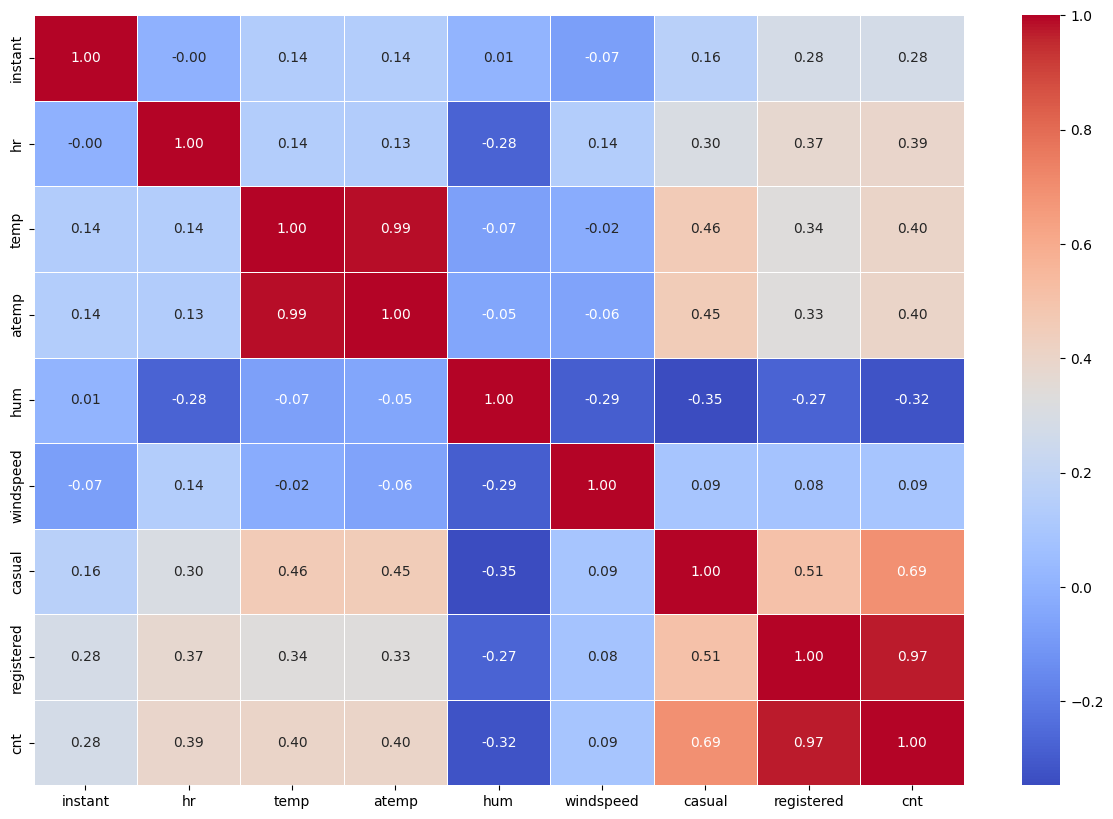

In [15]:
numerical_cols = hour.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = hour[numerical_cols].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

**Insight:**
- Total peminjaman (`cnt`) sangat dipengaruhi oleh peminjam terdaftar (`registered`), suhu (`temp`), jam (`hr`), dan kelembapan (`hum`).
- Fitur seperti `windspeed` tampak kurang signifikan secara korelasi langsung, tapi bisa jadi penting jika dianalisis secara terpisah berdasarkan tipe pengguna atau kondisi khusus.

### Distribusi Jumlah Peminjaman Sepeda

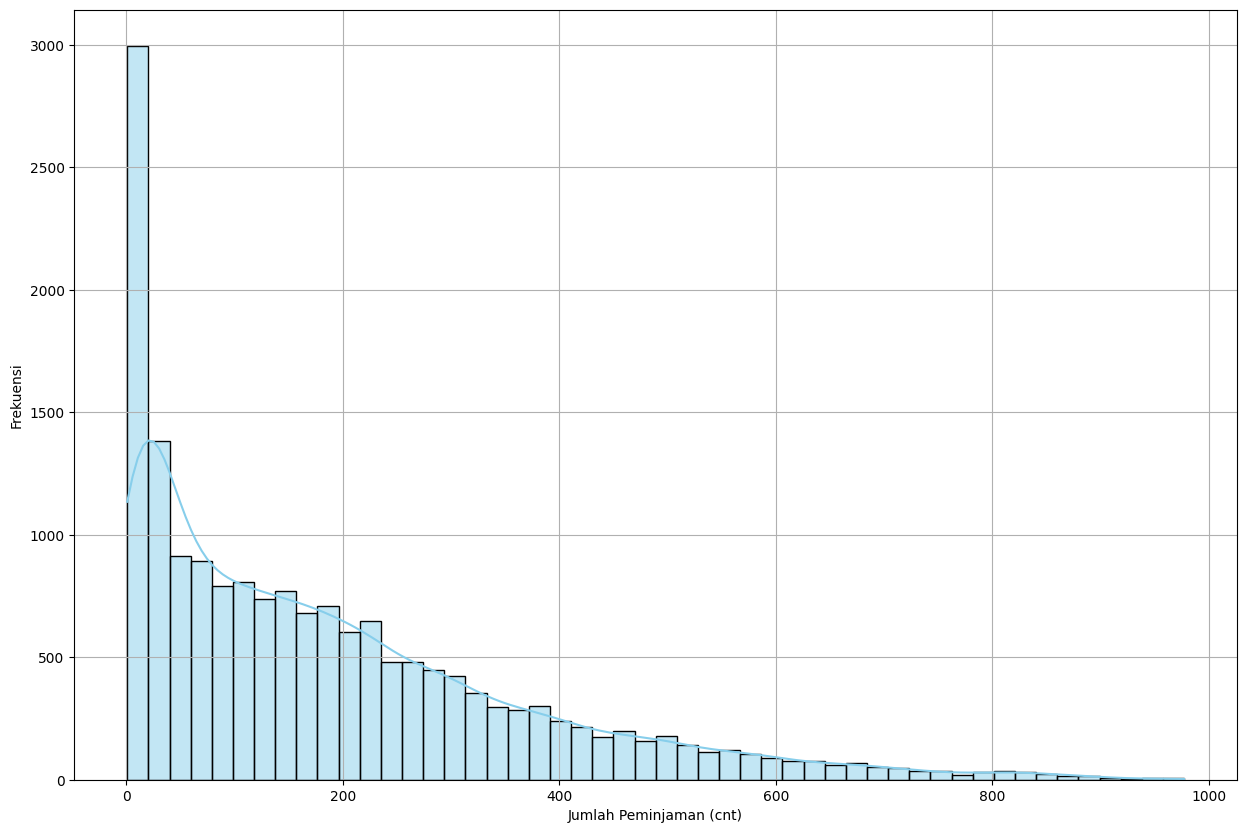

In [16]:
plt.figure(figsize=(15, 10))
sns.histplot(hour['cnt'], bins=50, kde=True, color='skyblue')
plt.xlabel('Jumlah Peminjaman (cnt)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

**Insight:**
- Distribusi peminjaman sepeda merupakan positif skewed (right skewed distribution) dengan mayoritas jumlah peminjaman per jam berada di kisaran 0–200 sepeda, ini menunjukkan bahwa sebagian besar waktu cenderung sepi, dan hanya pada waktu-waktu tertentu terjadi lonjakan peminjaman
- Banyak jam sepi aktivitas dengan puncak histogram terjadi pada jumlah peminjaman yang sangat rendah (0–50), menunjukkan bahwa dalam banyak jam, peminjaman sepeda sangat rendah, kemungkinan besar pada malam hari atau dini hari

### Distribusi Peminjaman Berdasarkan Musim dan Bulan

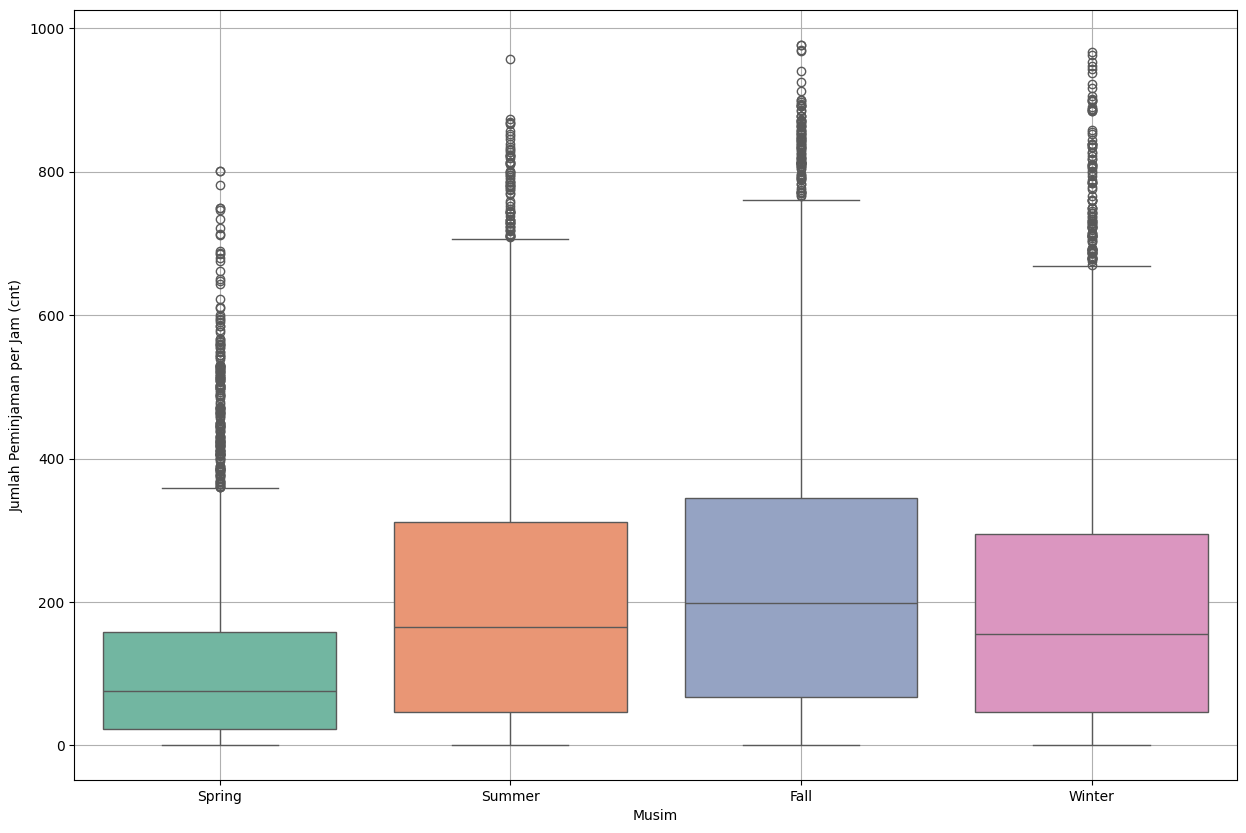

In [17]:
plt.figure(figsize=(15, 10))
sns.boxplot(x=hour['season'], y='cnt', data=hour, hue=hour['season'], legend=False, palette='Set2')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman per Jam (cnt)')
plt.grid(True)
plt.show()

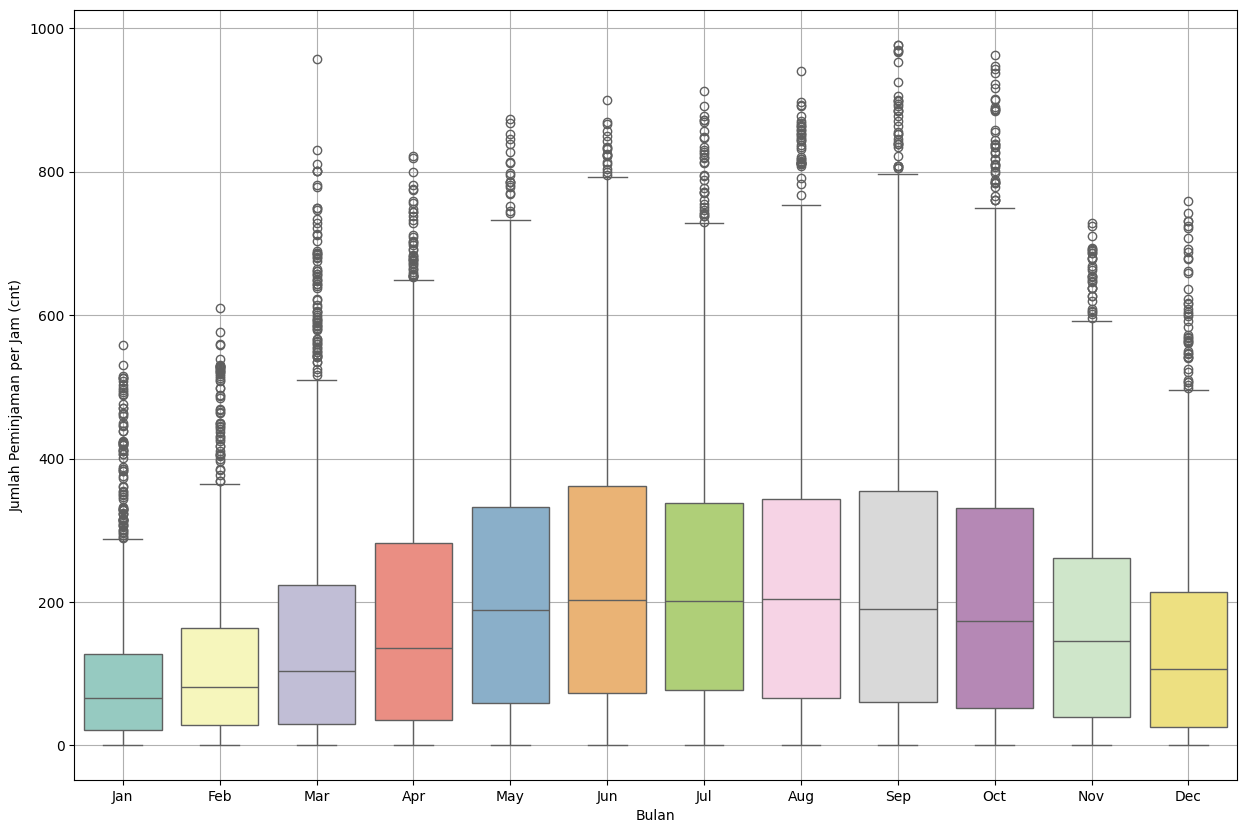

In [18]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(15, 10))
sns.boxplot(x=hour['mnth'], y='cnt', data=hour, hue=hour['mnth'], legend=False, palette='Set3', order=month_order)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman per Jam (cnt)')
plt.grid(True)
plt.show()

**Insight:**
- Fall (Musim Gugur) memiliki peminjaman tertinggi, diikuti Summer, Winter, dan Spring, sejalan dengan bulan Juli, Agustus, dan September adalah bulan dengan peminjaman tertinggi. Menunjukkan bahwa pengguna lebih aktif meminjam sepeda di musim gugur dan panas, kemungkinan karena cuaca yang nyaman dan hari yang lebih panjang
- Spring (Musim Semi), Winter (Musim Dingin) dan bulan Januari, Februari memiliki median dan sebaran nilai paling rendah karena cuaca masih tidak stabil atau transisi dari musim dingin membuat aktivitas luar ruang belum optimal
- Terdapat korelasi positif antara musim panas/gugur dengan peningkatan jumlah peminjaman

### Perbandingan Pengguna Casual vs Registered

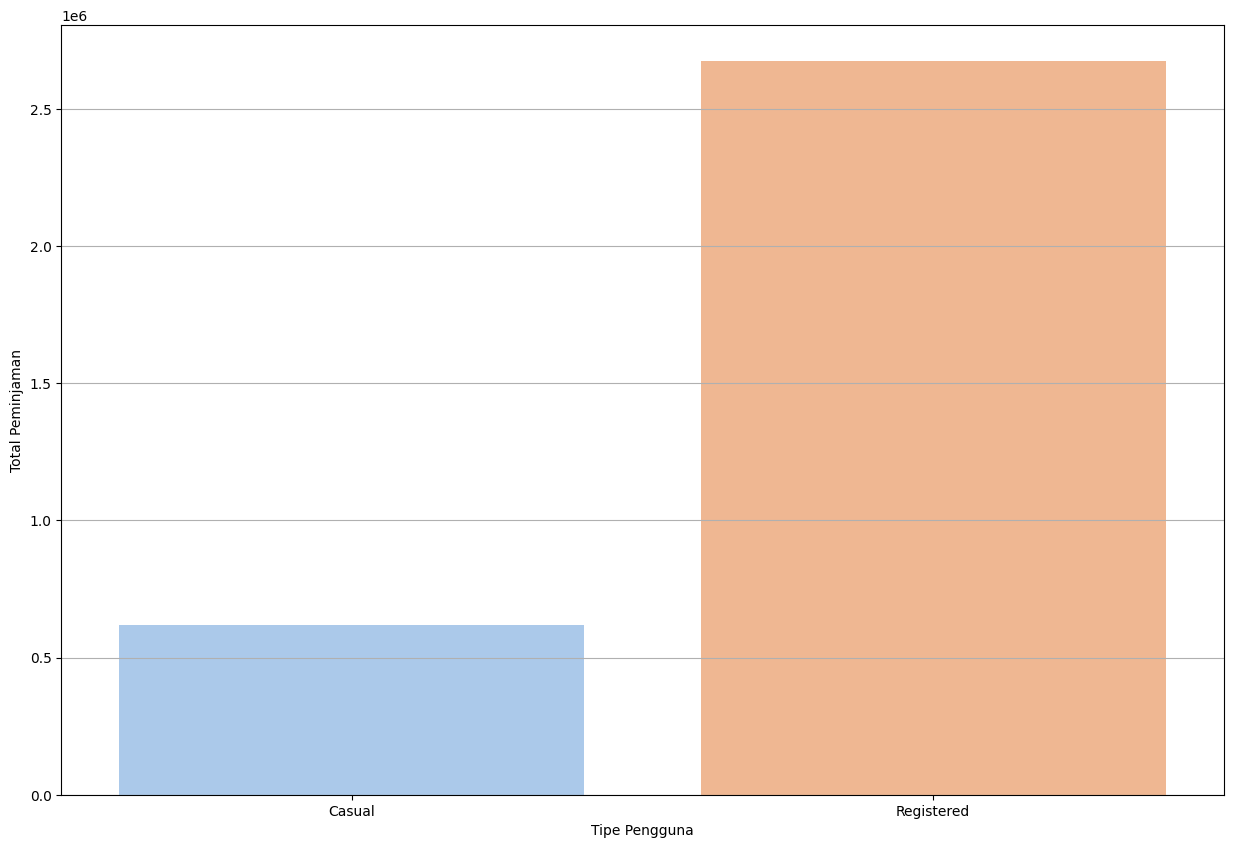

In [19]:
total_casual = hour['casual'].sum()
total_registered = hour['registered'].sum()

user_type = ['Casual', 'Registered']
user_count = [total_casual, total_registered]

plt.figure(figsize=(15, 10))
sns.barplot(x=user_type, y=user_count, hue=user_type, legend=False, palette='pastel')
plt.ylabel('Total Peminjaman')
plt.xlabel('Tipe Pengguna')
plt.grid(True, axis='y')
plt.show()

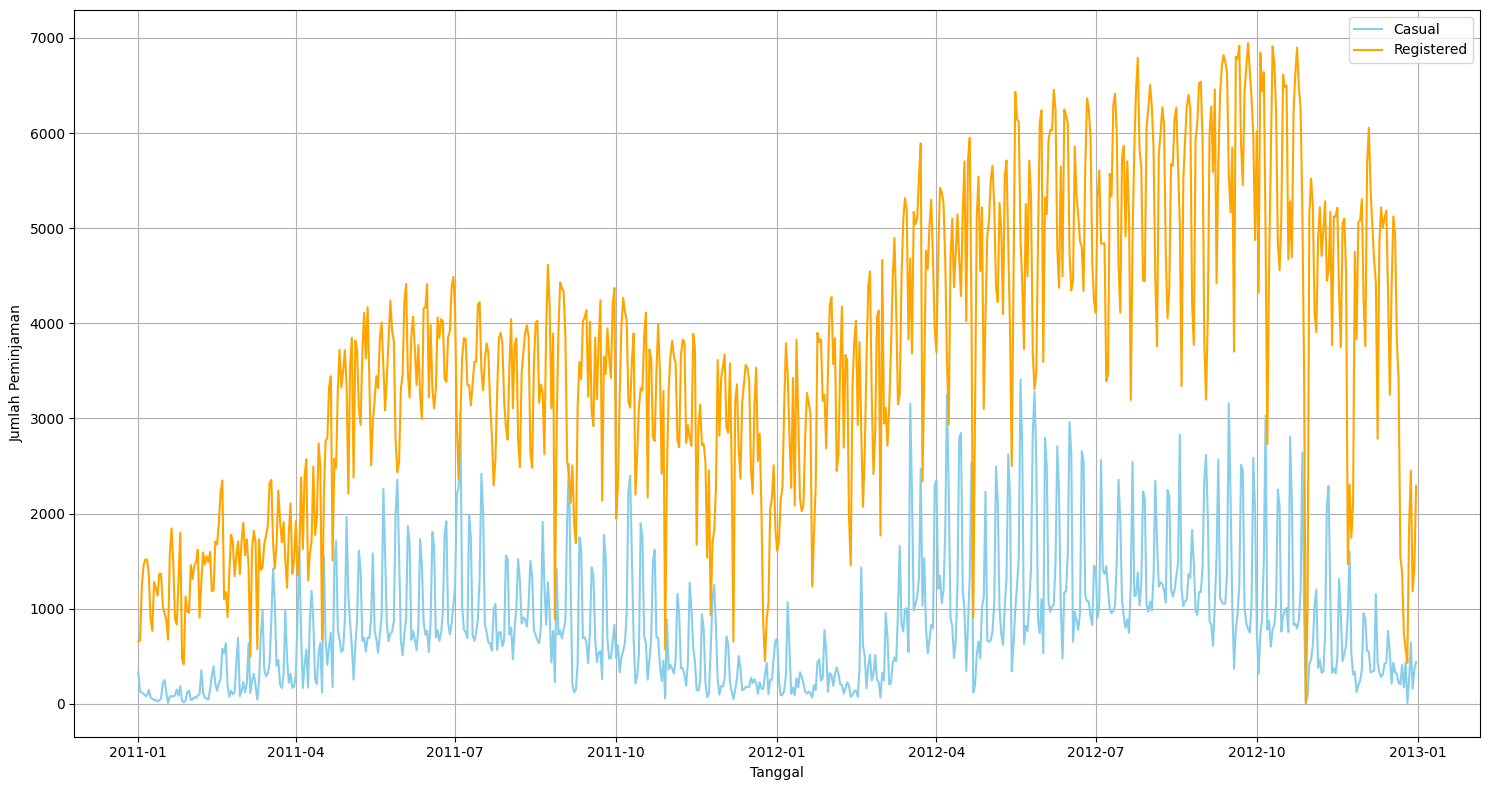

In [20]:
plt.figure(figsize=(15, 8))
plt.plot(day['dteday'], day['casual'], label='Casual', color='skyblue')
plt.plot(day['dteday'], day['registered'], label='Registered', color='orange')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight:**
- Total peminjaman oleh registered users jauh lebih tinggi dibandingkan casual users (lebih dari 4x lipat)
- Pada grafik time series, jumlah peminjaman oleh pengguna registered terlihat lebih stabil dan meningkat secara bertahap sepanjang tahun
- Pola peminjaman oleh pengguna casual menunjukkan fluktuasi tajam, dengan peningkatan signifikan di musim panas dan akhir pekan, lalu menurun drastis di musim dingin
- Berbeda dengan casual, peminjaman oleh registered tetap tinggi bahkan di musim dingin, mengindikasikan bahwa mereka merupakan pengguna rutin (commuter)

### Pengaruh Hari Libur dan Hari Kerja

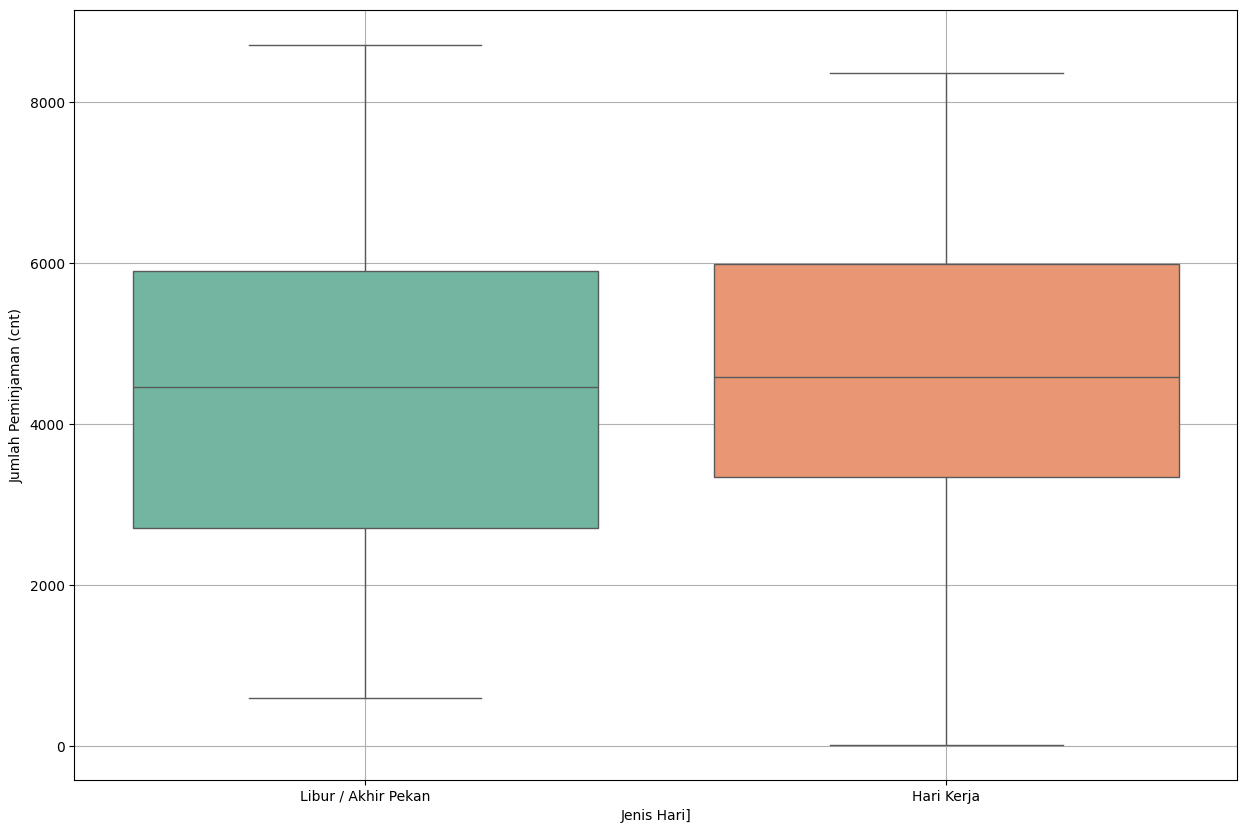

In [21]:
day_work = day.copy()
day_work['workingday'] = day_work['workingday'].map({'No': 'Libur / Akhir Pekan', 'Yes': 'Hari Kerja'})

plt.figure(figsize=(15, 10))
sns.boxplot(x='workingday', y='cnt', data=day_work, hue='workingday', legend=False, palette='Set2')
plt.xlabel('Jenis Hari]')
plt.ylabel('Jumlah Peminjaman (cnt)')
plt.grid(True)
plt.show()

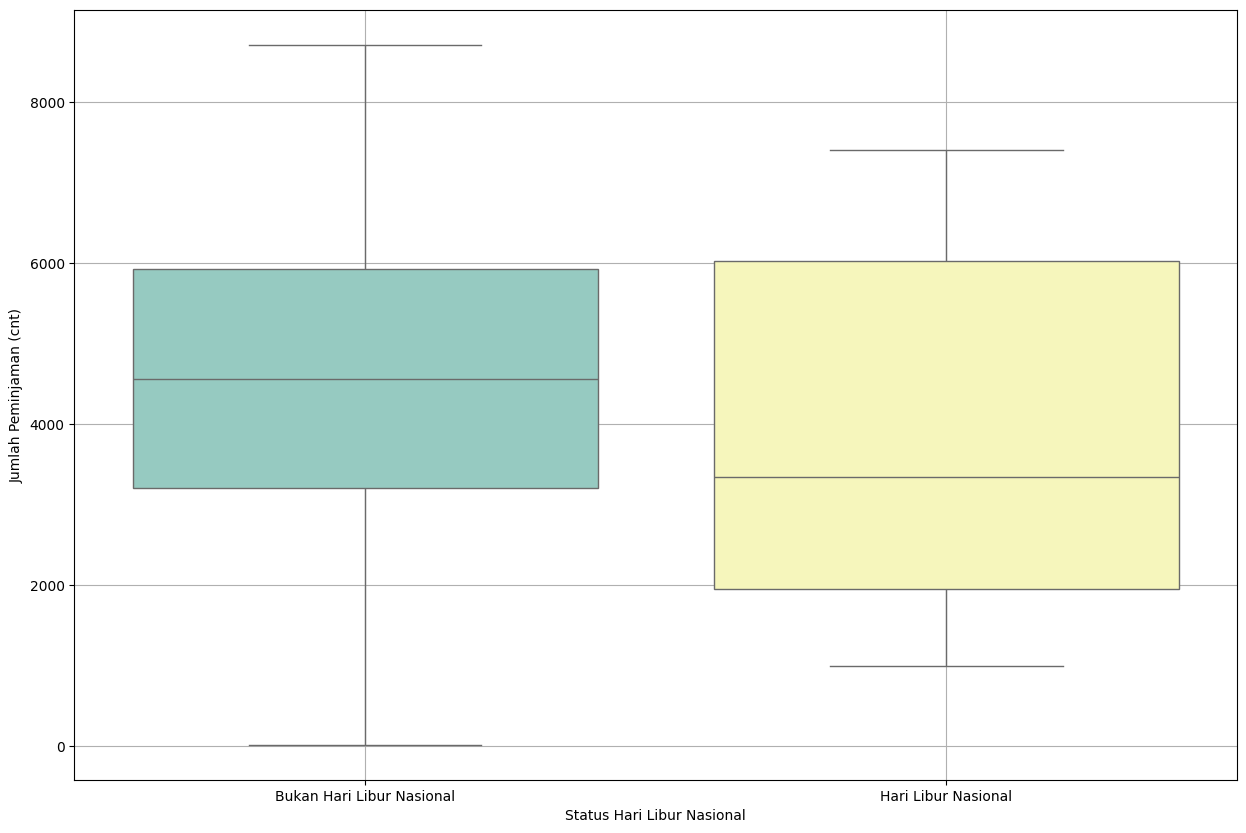

In [22]:
day_holiday = day.copy()
day_holiday['holiday'] = day_holiday['holiday'].map({'No': 'Bukan Hari Libur Nasional', 'Yes': 'Hari Libur Nasional'})

plt.figure(figsize=(15, 10))
sns.boxplot(x='holiday', y='cnt', data=day_holiday, hue='holiday', legend=False, palette='Set3')
plt.xlabel('Status Hari Libur Nasional')
plt.ylabel('Jumlah Peminjaman (cnt)')
plt.grid(True)
plt.show()

**Insight:**
- Hari kerja cenderung memiliki peminjaman yang stabil dan sedikit lebih tinggi secara median.
- Hari libur/akhir pekan tetap menunjukkan aktivitas tinggi, terutama dari pengguna casual.
- Hari libur nasional justru menurunkan aktivitas, kemungkinan karena cuaca buruk, event besar, atau kondisi tidak ideal untuk bersepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan waktu terbaik untuk menambah jumlah sepeda di stasiun-stasiun tertentu?

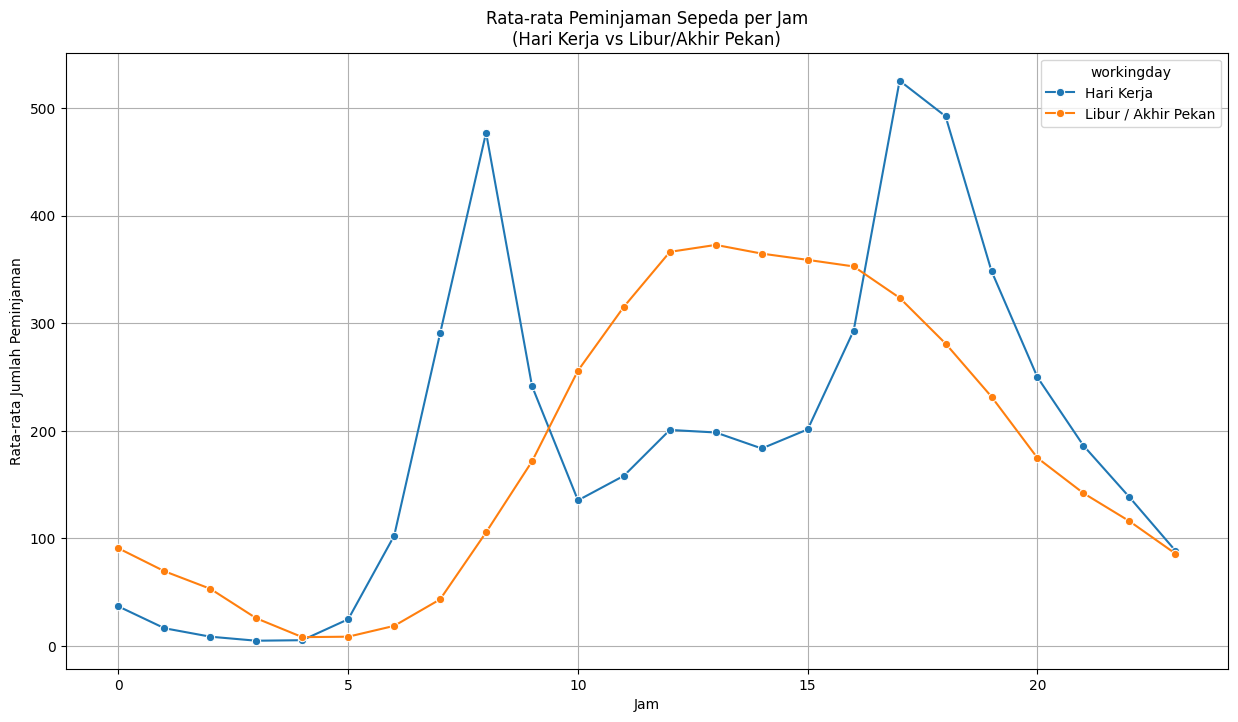

In [23]:
hour_grouped = hour.copy()
hour_grouped['workingday'] = hour_grouped['workingday'].map({'No': 'Libur / Akhir Pekan', 'Yes': 'Hari Kerja'})
avg_hour = hour_grouped.groupby(['workingday', 'hr'])['cnt'].mean().reset_index()

plt.figure(figsize=(15, 8))
sns.lineplot(data=avg_hour, x='hr', y='cnt', hue='workingday', marker='o')
plt.title('Rata-rata Peminjaman Sepeda per Jam\n(Hari Kerja vs Libur/Akhir Pekan)')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.grid(True)
plt.show()

**Insight Hari Kerja (Weekdays):**
1. Terdapat dua puncak peminjaman (peak hour):
  - Pagi hari pukul 08.00 (sekitar jam berangkat kerja/sekolah).
  - Sore hari pukul 17.00–18.00 (waktu pulang kerja).
2. Peminjaman melonjak tajam hanya pada dua jam tersebut, sisanya cukup stabil dan rendah.
3. Rekomendasi: Tambah jumlah sepeda di stasiun-stasiun strategis (dekat perkantoran/stasiun/terminal) pada jam 07.00–09.00 dan 16.00–18.00.

**Insight Hari Libur / Akhir Pekan (Weekend/Non-Working Day):**
1. Pola lebih landai dan menyebar: peminjaman mulai meningkat dari jam 10.00 hingga 16.00.
2. Tidak ada lonjakan ekstrem seperti di hari kerja, tapi jumlahnya cukup stabil dan tinggi di siang–sore hari.
3. Rekomendasi: Tambah sepeda di lokasi wisata, taman kota, dan jalur santai antara jam 10.00–17.00.

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap tingkat penggunaan sepeda?

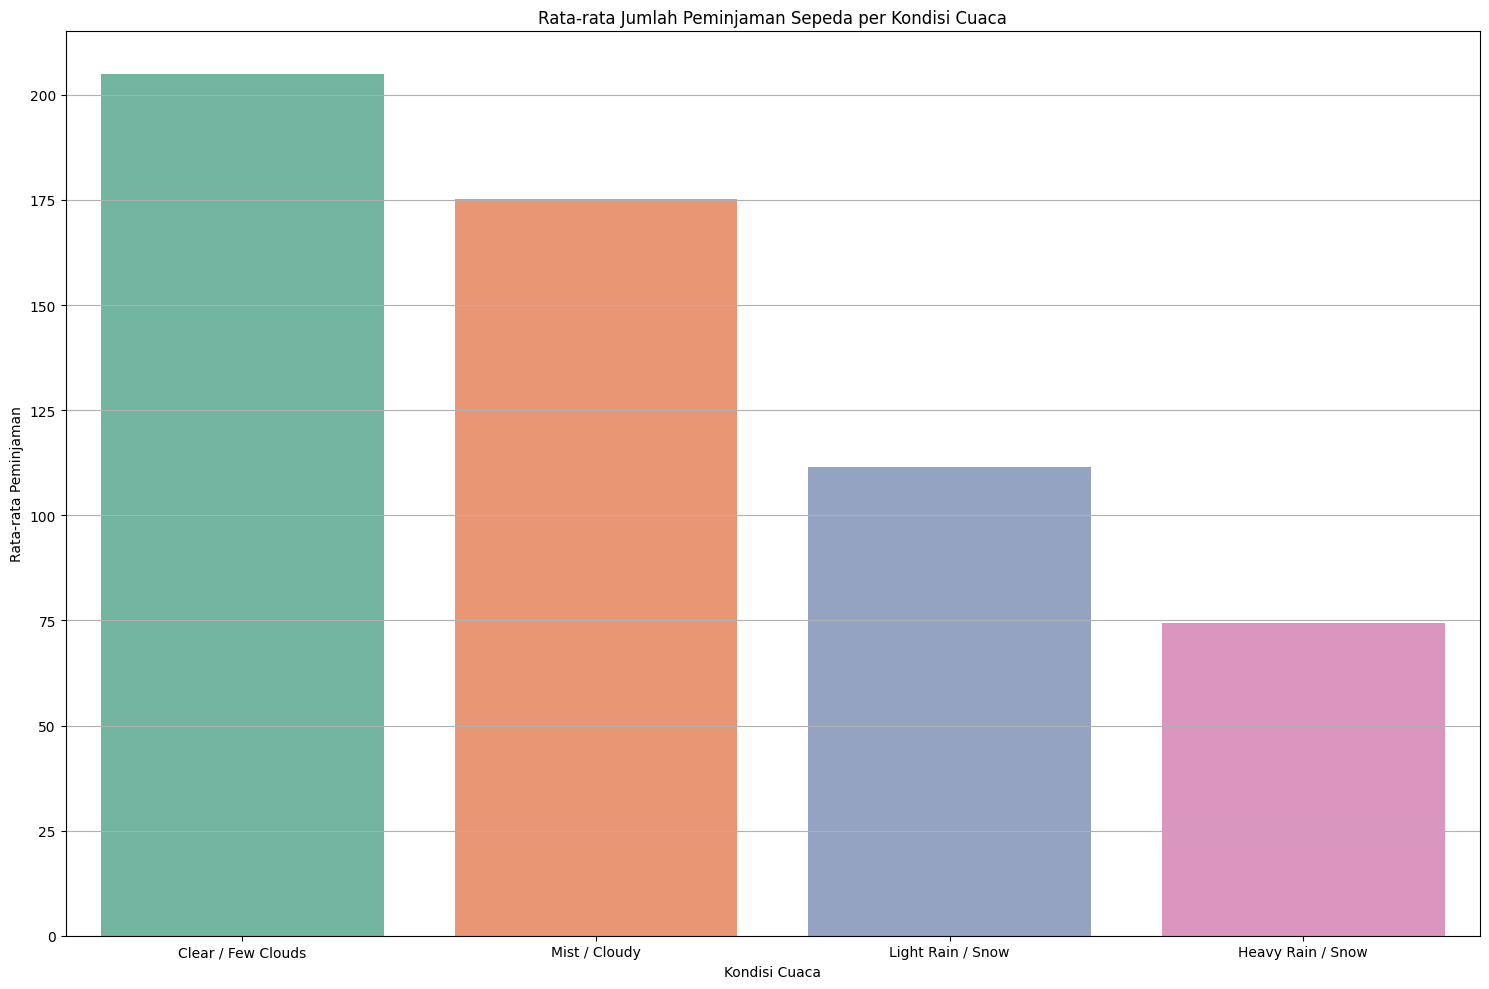

In [24]:
weather_avg = hour.groupby('weathersit')['cnt'].mean().reset_index()
weather_avg = weather_avg.sort_values(by='cnt', ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x='weathersit', y='cnt', data=weather_avg, hue='weathersit', legend=False, palette='Set2')
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Peminjaman')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Insight:**
- Cuaca cerah atau sedikit berawan mendorong peminjaman tertinggi, pengguna lebih aktif saat kondisi mendukung.
- Kondisi berawan/mendung masih mempertahankan tingkat peminjaman yang cukup tinggi, walau sedikit di bawah cuaca cerah.
- Hujan ringan atau salju ringan menurunkan rata-rata peminjaman secara signifikan.
- Hujan lebat atau salju lebat menyebabkan peminjaman paling rendah sehingga pengguna cenderung menghindari bersepeda dalam kondisi ekstrem.

### Pertanyaan 3: Bagaimana perbedaan pola peminjaman sepeda antara hari kerja dan hari libur pada pengguna kasual dan terdaftar?

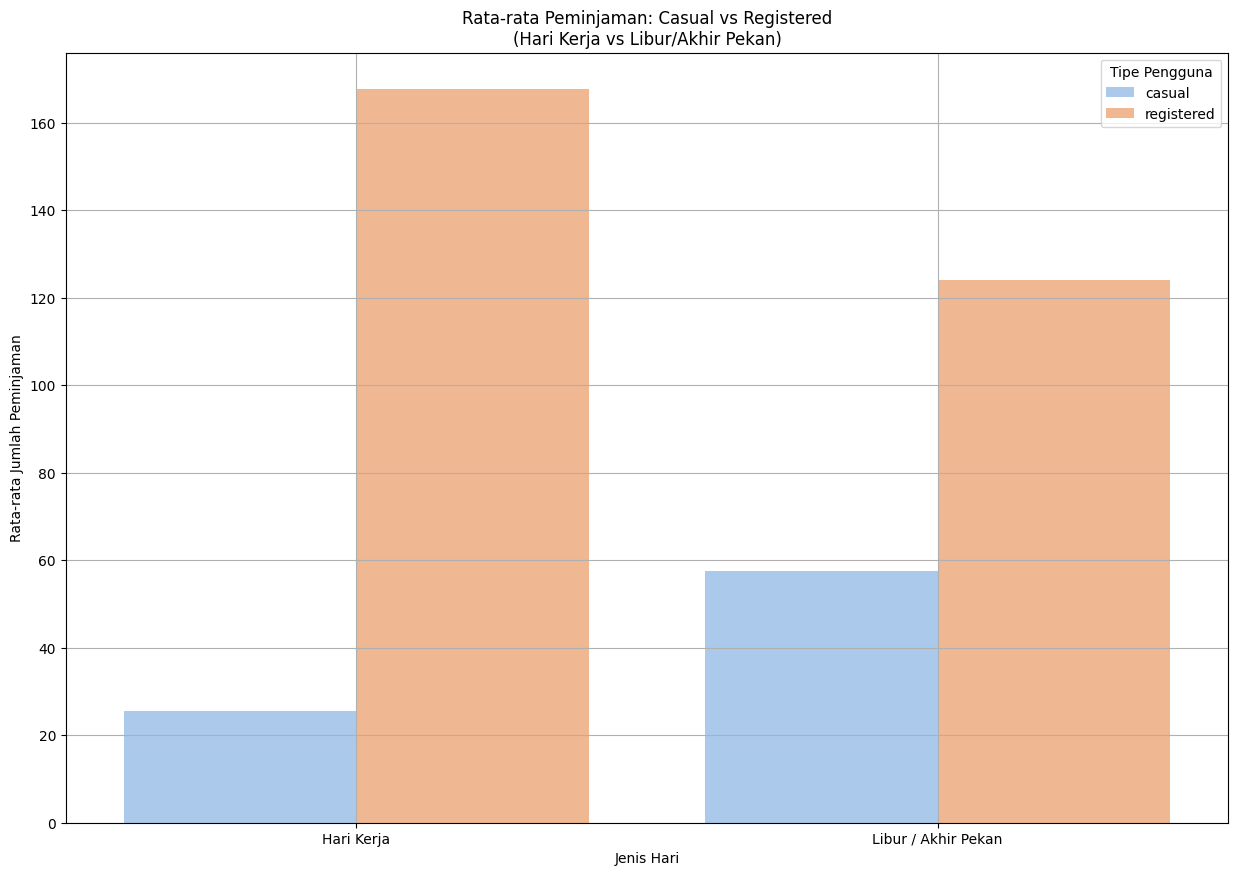

In [25]:
casual_registered = hour.copy()
casual_registered['workingday'] = casual_registered['workingday'].map({'No': 'Libur / Akhir Pekan', 'Yes': 'Hari Kerja'})

avg_user_type = casual_registered.groupby('workingday')[['casual', 'registered']].mean().reset_index()
avg_user_type = avg_user_type.melt(id_vars='workingday', var_name='Tipe Pengguna', value_name='Rata-rata Peminjaman')

plt.figure(figsize=(15, 10))
sns.barplot(data=avg_user_type, x='workingday', y='Rata-rata Peminjaman', hue='Tipe Pengguna', palette='pastel')
plt.title('Rata-rata Peminjaman: Casual vs Registered\n(Hari Kerja vs Libur/Akhir Pekan)')
plt.xlabel('Jenis Hari')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.grid(True)
plt.show()

**Insight:**
- Pengguna terdaftar (`registered`) memiliki rata-rata peminjaman lebih tinggi pada hari kerja dibanding hari libur/akhir pekan. Hal ini menunjukkan bahwa pengguna registered kemungkinan besar adalah komuter harian yang menggunakan sepeda untuk aktivitas rutin seperti berangkat dan pulang kerja.
- Pengguna tidak terdaftar (`casual`) justru memiliki rata-rata peminjaman lebih tinggi pada hari libur/akhir pekan dibanding hari kerja. Ini mengindikasikan bahwa pengguna casual lebih aktif saat waktu luang, kemungkinan besar untuk rekreasi, wisata, atau aktivitas santai.
- Hari libur dan akhir pekan memiliki dampak signifikan terhadap pola peminjaman, di mana:
  - Pengguna registered mendominasi pada hari kerja.
  - Pengguna casual lebih aktif saat akhir pekan atau hari libur.

## Analisis Lanjutan (Opsional)

### 1. Analisis Pola Peminjaman per Jam Berdasarkan Tipe Pengguna

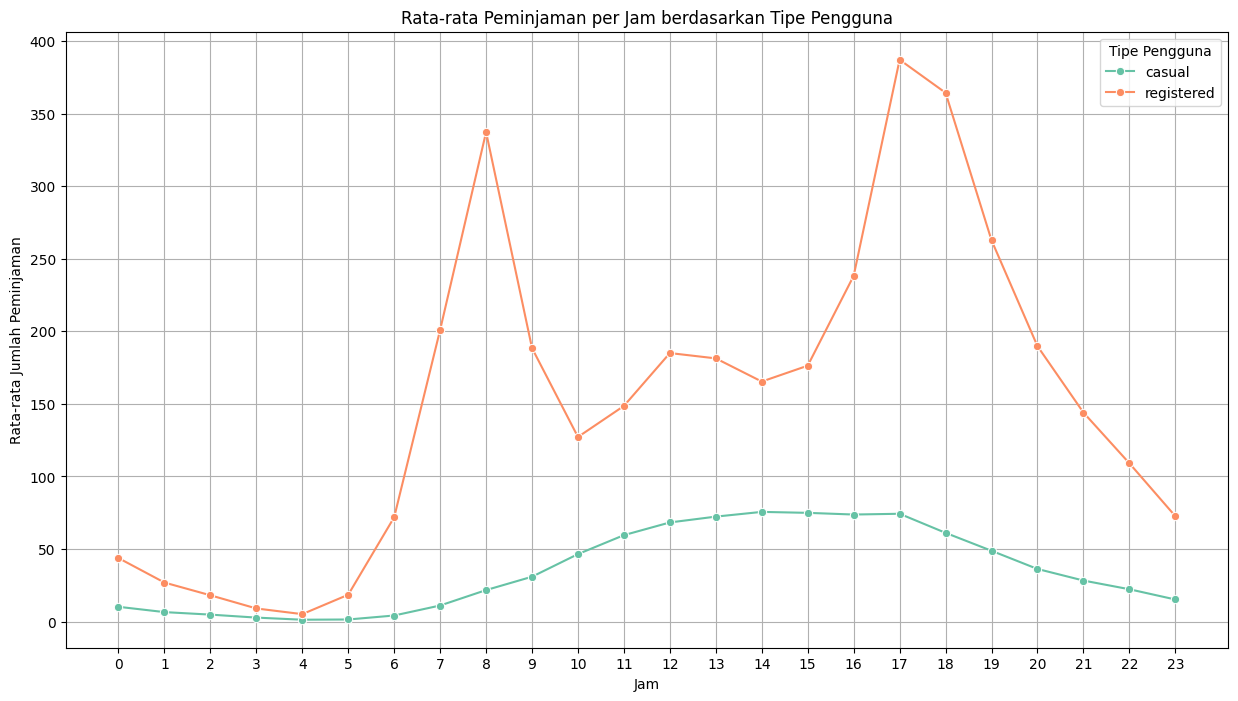

In [26]:
hour_by_user = hour.groupby('hr')[['casual', 'registered']].mean().reset_index()
hour_by_user = hour_by_user.melt(id_vars='hr', var_name='Tipe Pengguna', value_name='Rata-rata Peminjaman')

# Visualisasi
plt.figure(figsize=(15, 8))
sns.lineplot(data=hour_by_user, x='hr', y='Rata-rata Peminjaman', hue='Tipe Pengguna', marker='o', palette='Set2')
plt.title('Rata-rata Peminjaman per Jam berdasarkan Tipe Pengguna')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

**Insight:**
- Pengguna Registered menunjukkan pola peminjaman dengan dua puncak utama: pagi hari (07:00–08:00) dan sore hari (17:00–18:00), yang mencerminkan aktivitas komuter harian seperti berangkat dan pulang kerja atau sekolah.
- Pengguna Casual memiliki pola yang cenderung stabil dan meningkat secara bertahap, dengan puncak pada siang hingga sore hari (13:00–15:00), menunjukkan penggunaan yang lebih fleksibel dan rekreasional terutama di luar jam kerja.

### 2. Analisis Perbandingan Musiman Berdasarkan Tipe Pengguna

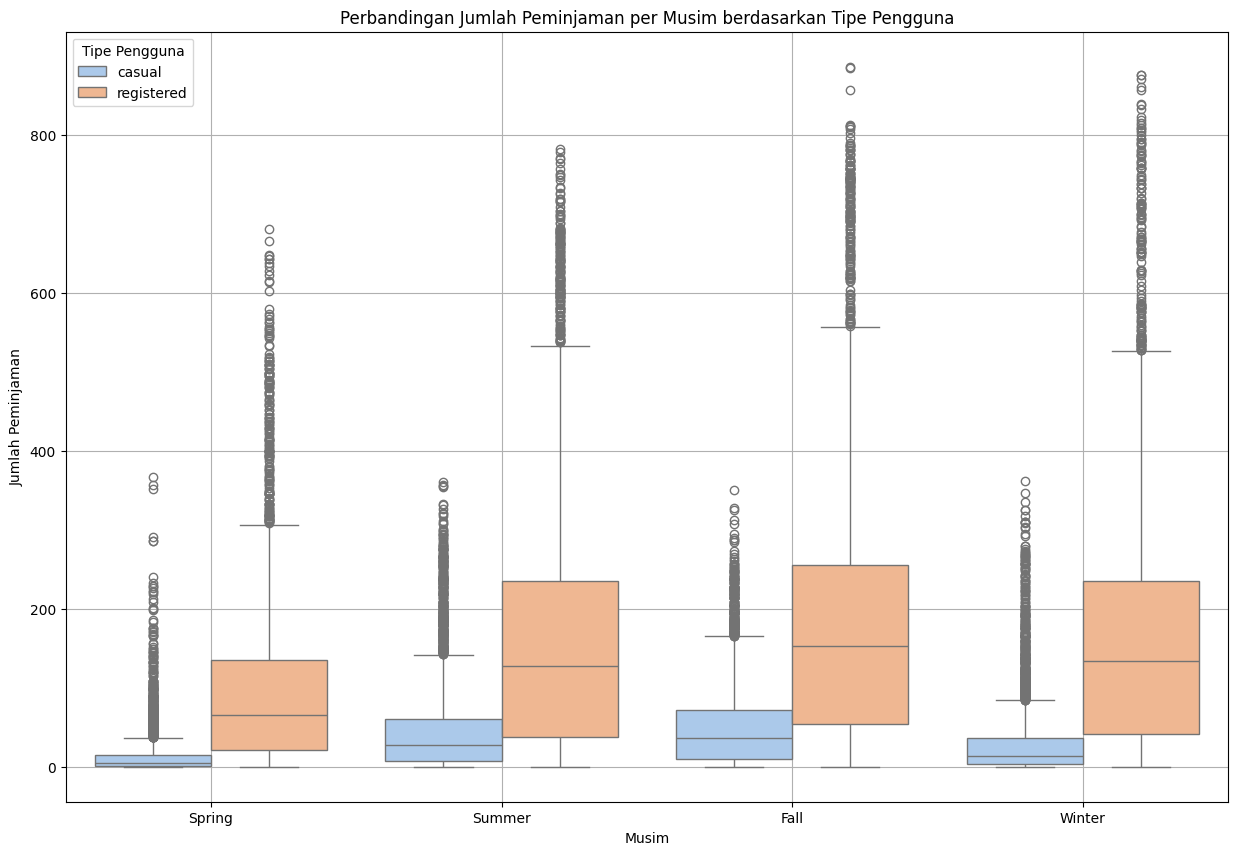

In [27]:
hour_season_melt = hour.melt(id_vars='season', value_vars=['casual', 'registered'],
                                    var_name='Tipe Pengguna', value_name='Jumlah Peminjaman')

plt.figure(figsize=(15, 10))
sns.boxplot(data=hour_season_melt, x='season', y='Jumlah Peminjaman', hue='Tipe Pengguna', palette='pastel')
plt.title('Perbandingan Jumlah Peminjaman per Musim berdasarkan Tipe Pengguna')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.show()

**Insight:**
- Pengguna casual paling aktif saat musim panas dan gugur, dengan penurunan tajam di musim dingin, menunjukkan bahwa mereka sangat dipengaruhi oleh kondisi cuaca dan menggunakan sepeda terutama untuk aktivitas rekreasional.
- Pengguna registered menunjukkan pola peminjaman yang lebih stabil sepanjang musim, mengindikasikan penggunaan sepeda yang rutin dan fungsional seperti untuk keperluan transportasi harian, meskipun terjadi sedikit penurunan di musim dingin.

## Conclusion

1. Waktu terbaik untuk menambah jumlah sepeda sangat bergantung pada hari dan jenis pengguna yang dominan:
  - Hari kerja (weekdays):
    - Puncak peminjaman terjadi dua kali, yakni pukul 07:00–08:00 dan 17:00–18:00, yang didominasi oleh pengguna registered (komuter).
    - Rekomendasi: Tambahkan sepeda di stasiun yang berada dekat dengan perkantoran, stasiun transportasi umum, dan area bisnis pada jam-jam tersebut.
  - Akhir pekan / hari libur (weekend/non-working day):
    - Peminjaman sepeda meningkat secara bertahap mulai pukul 10:00 dan mencapai puncaknya pada 13:00–16:00, yang didominasi oleh pengguna casual (rekreasional).
    - Rekomendasi: Fokuskan penambahan sepeda di area wisata, taman kota, jalur sepeda santai, terutama antara jam 10:00–17:00.
2. Cuaca memiliki pengaruh yang signifikan terhadap intensitas peminjaman:
  - Cuaca cerah atau sedikit berawan mendukung jumlah peminjaman tertinggi untuk semua tipe pengguna.
  - Cuaca mendung sedikit menurunkan peminjaman, tetapi aktivitas masih tetap berjalan, terutama dari pengguna registered.
  - Cuaca hujan ringan/salju ringan menyebabkan penurunan tajam pada jumlah peminjaman, terutama dari pengguna casual yang lebih sensitif terhadap kondisi cuaca.
  - Cuaca ekstrem seperti hujan lebat atau salju lebat sangat membatasi aktivitas bersepeda, dengan jumlah peminjaman terendah secara keseluruhan.
3. Terdapat perbedaan pola yang signifikan peminjam berdasarkan jenis hari:
  - Pengguna registered lebih aktif pada hari kerja, dengan rata-rata peminjaman lebih tinggi, konsisten dengan perilaku komuter yang menggunakan sepeda sebagai alat transportasi rutin.
  - Pengguna casual justru lebih aktif pada hari libur dan akhir pekan, dengan lonjakan peminjaman saat waktu luang, menunjukkan pola rekreasional.